# 더미 데이터 만들기

## Feature ( Input )

- 년, 월, 일, 요일, 시, 분, 초, 자동모드, 조도 센서 값
- 월, 일 => Day of Year 로 변환 ( DOY; 0~ 364 )
- 시, 분, 초 => Time of Day 로 변환 ( TOD; 0 ~ 86399 )
- 자동모드 => 0 이면 밝기 0

## Target Value ( Output)

- 조명의 밝기 값

---

## 센서, 액츄에이터 특징

### 조도 센서

- 0 ~ 1023 사이의 값을 가짐
- 밝을 때 센서의 값은 낮게 나옴
- 어두울 때 센서의 값은 높게 나옴

### 전등 밝기값

- 0 ~ 255 사이의 값을 가질 수 있음(PWM)
- 높을 수록 밝은 값

---

## 예상되는 규칙

- 06~15시쯤(밖 밝음, 건물 내 불 꺼짐) : 조도 센서값 낮음, 조명의 밝기 낮음
- 15시~22시쯤(밖 어둡고, 건물 내 불 켜짐) : 조도 센서값 낮음, 조명의 밝기 높음
- 22시~06시쯤(밖 어둡고, 건물 내 불 꺼짐) : 조도 센서값 높음, 노명의 밝기 높음

## 데이터 생성 방식

- 0시 0분 0초부터 23시 59분 59초까지 86400개의 row 생성
- 조도 센서 값은 해당 범위에서 cos 함수의 한 주기를 넣음. 값의 scale은 0~1023
- 조명 밝기 값은 해당 범위에서 sin 함수의 반 주기를 넣음. 값의 scale은 0~255

In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
import matplotlib.pyplot as plt

In [3]:
seconds = 86400
days = 10

In [5]:
# illuminance, brightness
illum_range = np.linspace(0, 2*np.pi * days, seconds * days, dtype = np.float16)
bright_range = np.linspace(0, np.pi * days, seconds * days, dtype = np.float16)

In [6]:
data_illum = np.cos(illum_range)
data_illum = data_illum + 1
data_illum = data_illum * 1023 / 2
data_illum = data_illum.astype(int)
data_illum

array([1023, 1023, 1023, ..., 1023, 1023, 1023])

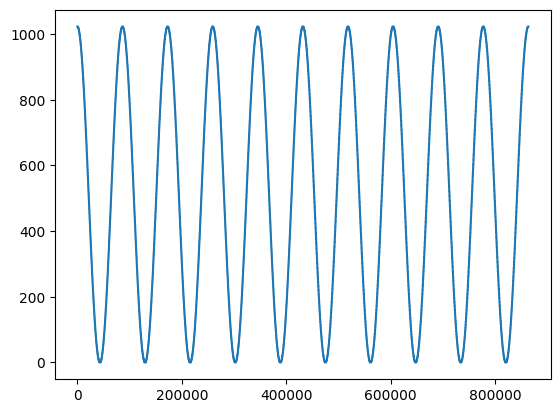

In [7]:
plt.plot(data_illum, label = "illum")
plt.show()

In [8]:
data_bright = np.abs(np.sin(bright_range))
data_bright = data_bright * 255
data_bright = data_bright.astype(int)
data_bright

array([0, 0, 0, ..., 1, 1, 1])

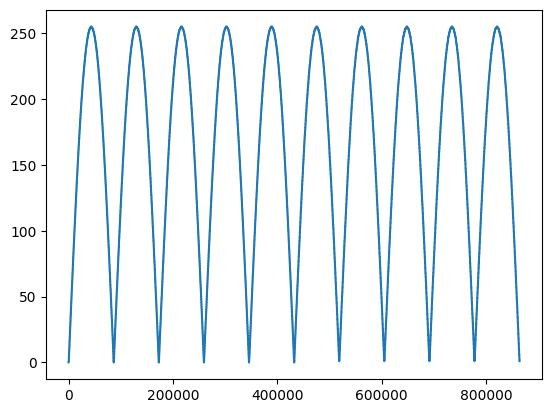

In [9]:
plt.plot(data_bright, label = "bright")
plt.show()

In [10]:
seconds = 86400
days = 10

# 시작 날짜 및 시간 설정
start_datetime = datetime.datetime(2023, 11, 3, 0, 0, 0)  # 원하는 시작 날짜 및 시간 설정
first_day_of_year = datetime.datetime(start_datetime.year, 1, 1)
# 데이터를 저장할 리스트 생성
data = []

# 1초 간격으로 데이터 생성하여 리스트에 추가
for i in range(seconds * days):  # 하루는 총 86,400초
    current_datetime = start_datetime + datetime.timedelta(seconds=i)
    elapsed_time = current_datetime - start_datetime

    DOY = (current_datetime - first_day_of_year).days
    weekday = current_datetime.strftime("%w")
    TOD = current_datetime.hour * 3600 + current_datetime.minute * 60 + current_datetime.second

    data.append([DOY, TOD, weekday])

# 데이터프레임 생성
df = pd.DataFrame(data, columns=["DOY", "TOD", "weekday"])

# 데이터프레임 출력
print(df)

        DOY    TOD weekday
0       306      0       5
1       306      1       5
2       306      2       5
3       306      3       5
4       306      4       5
...     ...    ...     ...
863995  315  86395       0
863996  315  86396       0
863997  315  86397       0
863998  315  86398       0
863999  315  86399       0

[864000 rows x 3 columns]


In [11]:
np_array = df.values
np_array = np_array.astype(int)
print(np_array)

[[  306     0     5]
 [  306     1     5]
 [  306     2     5]
 ...
 [  315 86397     0]
 [  315 86398     0]
 [  315 86399     0]]


In [13]:
data_illum = data_illum.reshape(seconds * days, 1)
data_bright = data_bright.reshape(seconds * days, 1)
data_illum

array([[1023],
       [1023],
       [1023],
       ...,
       [1023],
       [1023],
       [1023]])

In [14]:
mdata = np.concatenate((np_array, data_illum, data_bright),axis=1)
mdata

array([[  306,     0,     5,  1023,     0],
       [  306,     1,     5,  1023,     0],
       [  306,     2,     5,  1023,     0],
       ...,
       [  315, 86397,     0,  1023,     1],
       [  315, 86398,     0,  1023,     1],
       [  315, 86399,     0,  1023,     1]])

--- 
## .csv 파일로 저장

In [15]:
file_path = "sample_231103_02.csv"
np.savetxt(file_path, mdata, delimiter=",", fmt="%d")
# delimiter : 열 구분자
# fmt: CSV 파일에 저장될 데이터의 형식 지정. %d는 정수.

## .csv 파일 불러오기

In [ ]:
myData = np.genfromtxt(file_path, delimiter=",", dtype=int)
print(myData)